In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
def load_data(city):
    labels = pd.read_csv('../data/dengue_labels_train.csv', parse_dates=True)
    features = pd.read_csv('../data/dengue_features_train.csv', parse_dates=True)

    all_data = pd.merge(labels, features, on=['city', 'year', 'weekofyear'])
    all_data = all_data.sort_values(['year', 'weekofyear'], ascending=[True, True])
    all_data.fillna(method='ffill', inplace=True)
    all_data.fillna(method='bfill', inplace=True)
    city_data = all_data[all_data['city'] == city].drop(['city', 'week_start_date'], axis=1)
    return city_data

    
sj_df = load_data('sj')
iq_df = load_data('iq')

# Correlation Analysis

This document explores the correlations in the data. Be it autocorrelation of each variable or cross-correlation between variables.

All plots are individual for each city and should be San Juan first, Iquitos second

## Total Cases Autocorrelation

#### Observations

- Both series show peaks in autocorrelation every 50 weeks or so (1 year)
- San Juan Data seems weirdly better behaved than Iquitos with respect to Autocorrelation


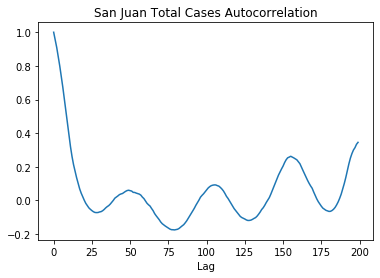

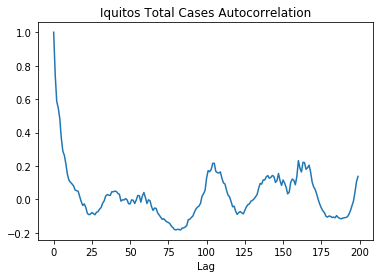

In [3]:
sj_autocorr = [sj_df.total_cases.autocorr(i) for i in range(200)]
plt.plot(sj_autocorr)
plt.title("San Juan Total Cases Autocorrelation")
plt.xlabel("Lag")
plt.show()

iq_autocorr = [iq_df.total_cases.autocorr(i) for i in range(200)]
plt.plot(iq_autocorr)
plt.title("Iquitos Total Cases Autocorrelation")
plt.xlabel("Lag")
plt.show()

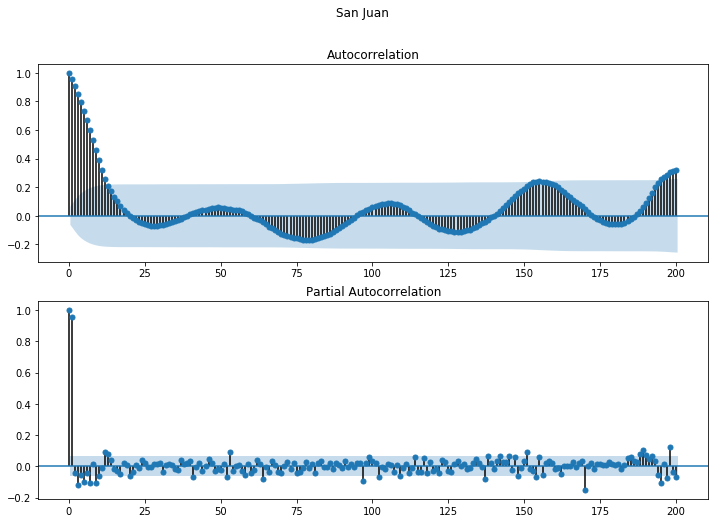

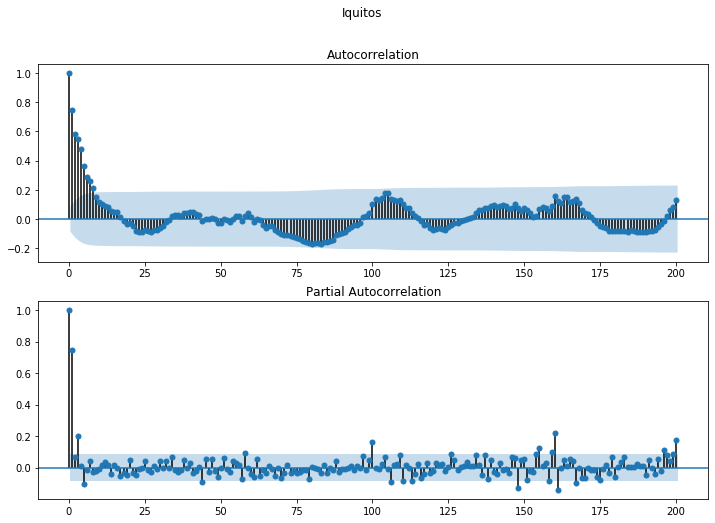

In [4]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sj_df.total_cases, lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sj_df.total_cases, lags=200, ax=ax2)
fig.suptitle("San Juan");

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(iq_df.total_cases, lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(iq_df.total_cases, lags=200, ax=ax2)
fig.suptitle("Iquitos");

## Cross Correlation Analysis

## Pearson Correlation

We note the following for both the datasets:

- No variables are exceptionally good at predicting the label (total cases)

- The first 4 variables (Normalized Difference Vegetation Index) variables appears to be very weakly correlated with the other variables. They do not appear to be very useful in predicting the labels.

- Most of temperature variables in both datasets appear to be strongly correlated with one another.


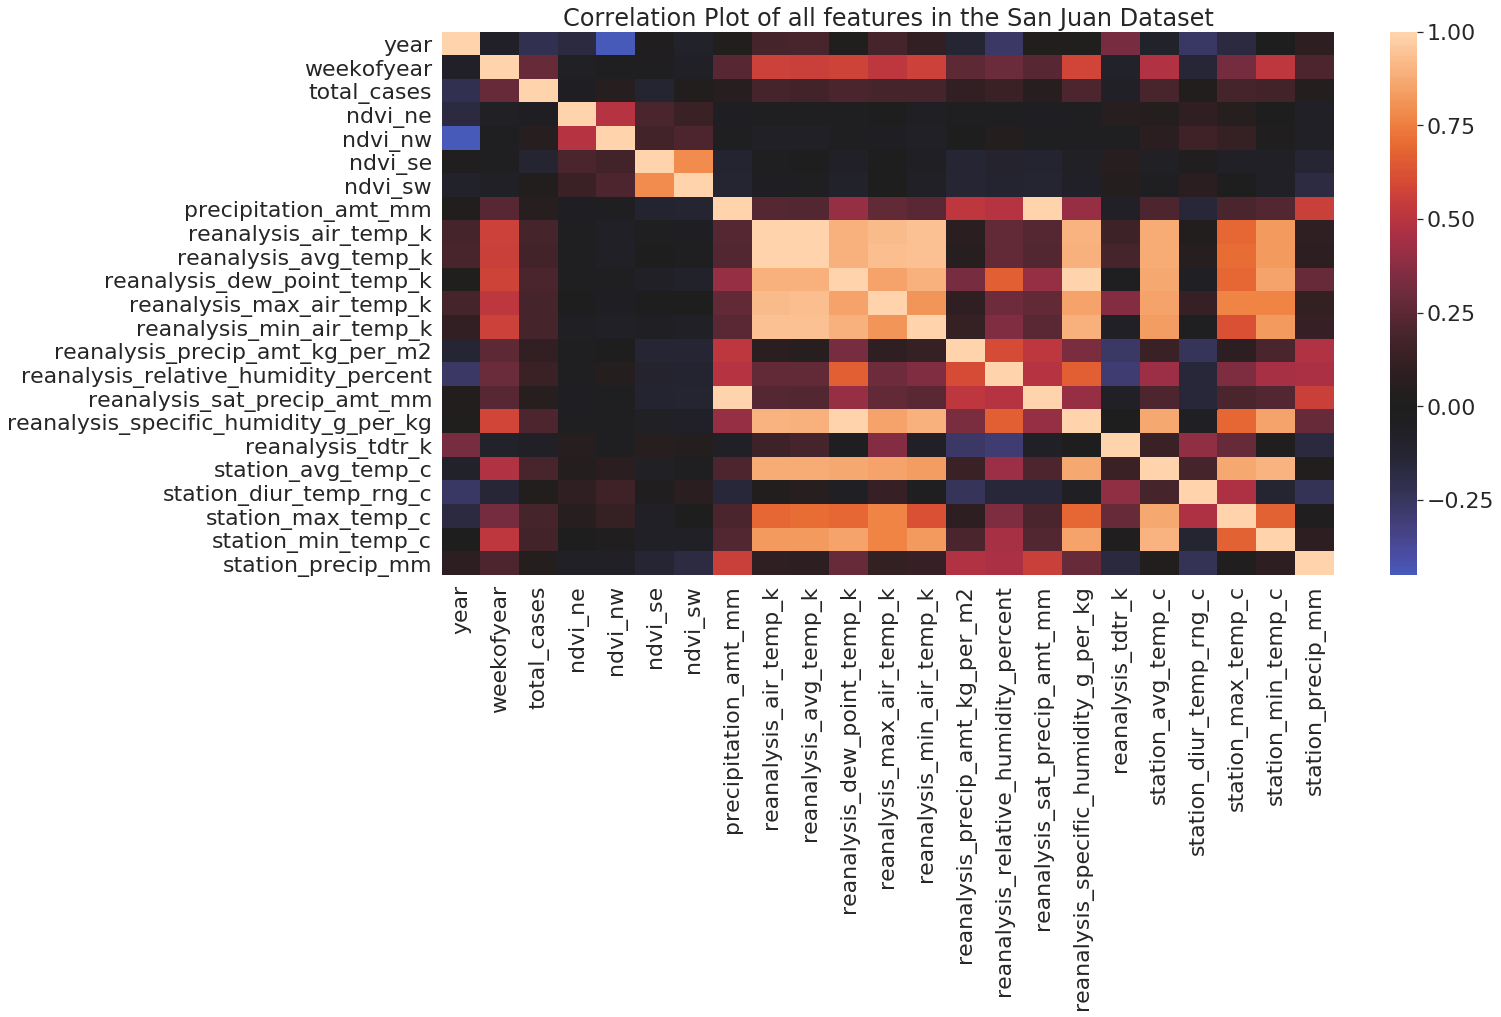

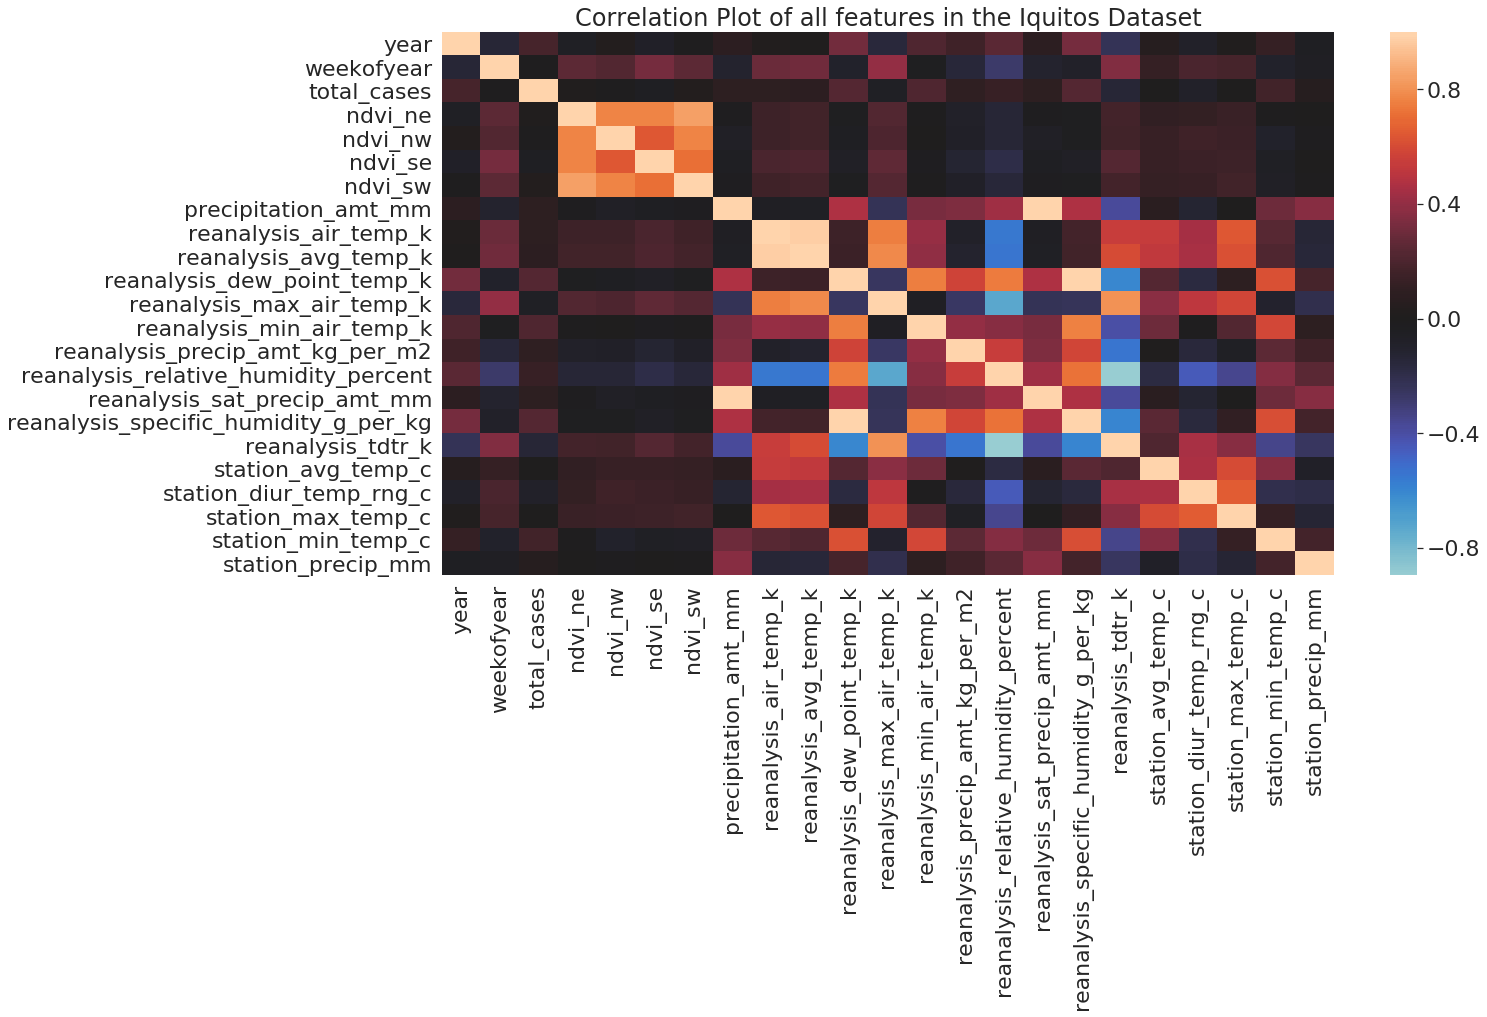

In [5]:
sj_corr = sj_df.corr()
iq_corr = iq_df.corr()

sns.set(font_scale = 2)

plt.figure(figsize=(20, 10))
sns.heatmap(sj_corr, center=0)
plt.title('Correlation Plot of all features in the San Juan Dataset')

plt.figure(figsize=(20, 10))
sns.heatmap(iq_corr, center=0)
plt.title('Correlation Plot of all features in the Iquitos Dataset')

plt.show()


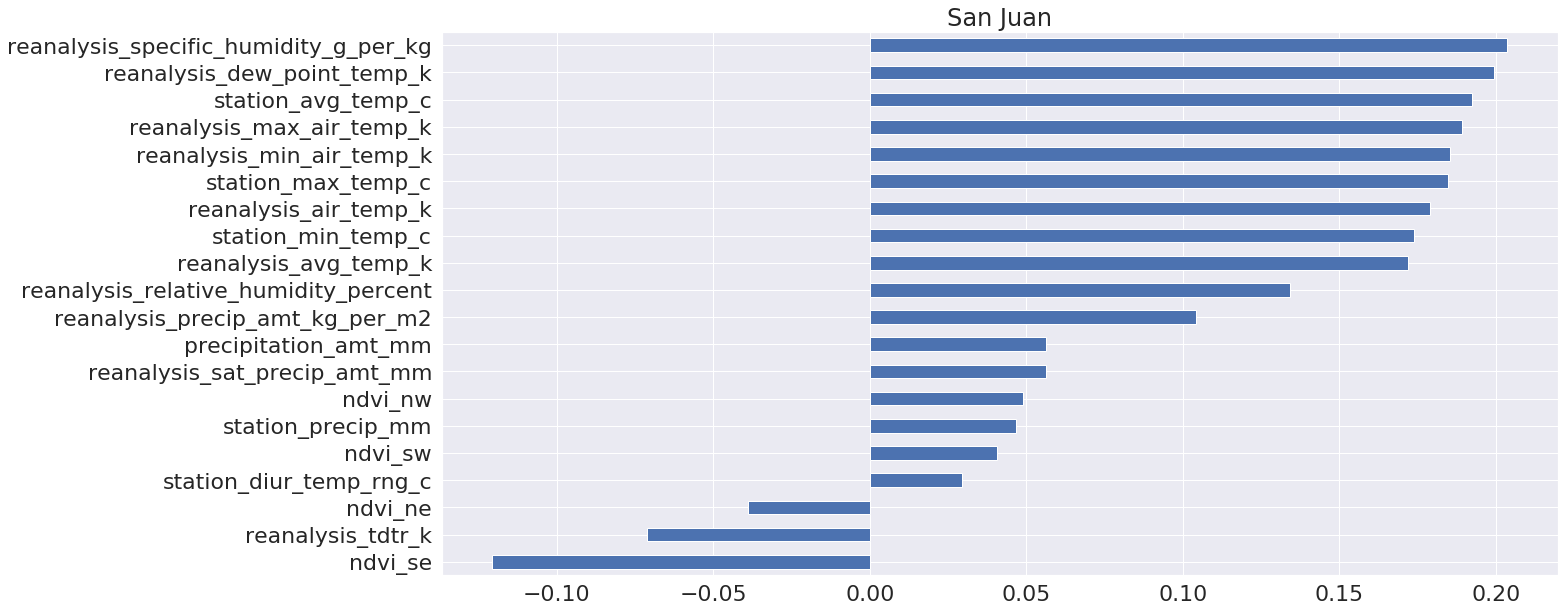

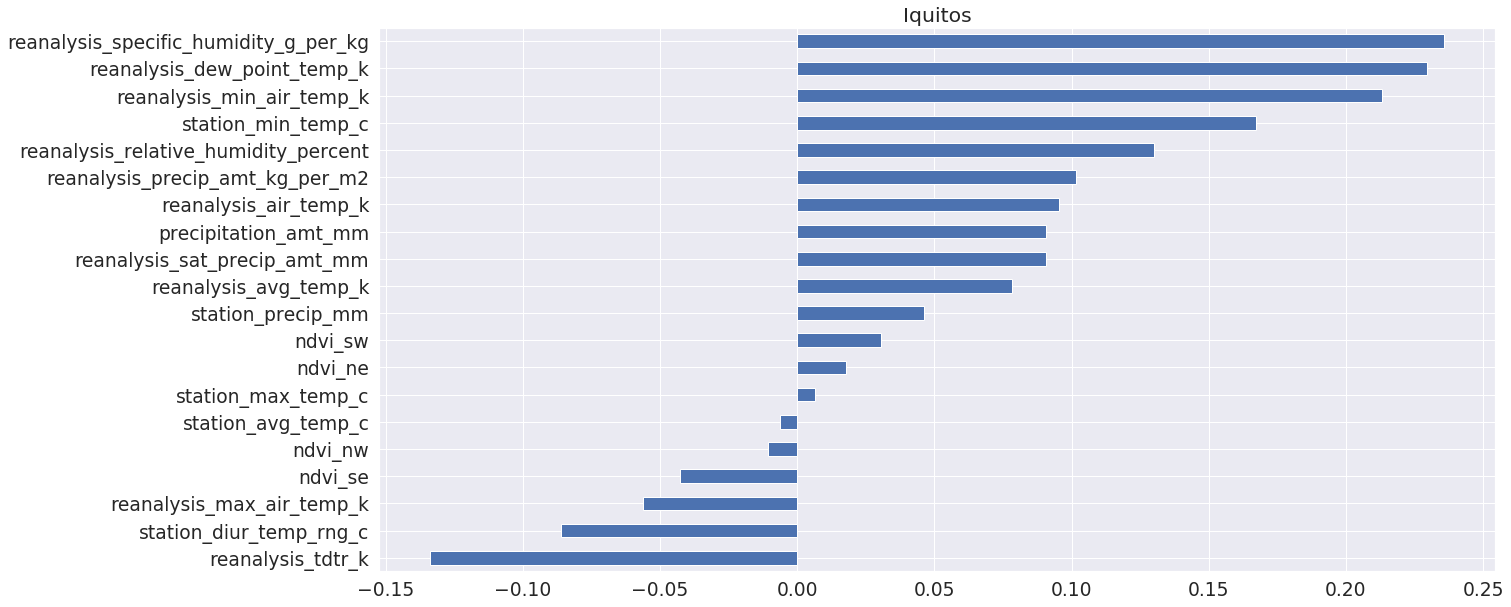

In [6]:
plt.figure(figsize=(20,10))
plt.title('San Juan')
sns.set(font_scale=1.7)
(sj_corr
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

plt.figure(figsize=(20,10))
plt.title('Iquitos')
sns.set(font_scale=1.7)
(iq_corr
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

## Spearman Correlation

Not much noticeable difference from pearson correlation results


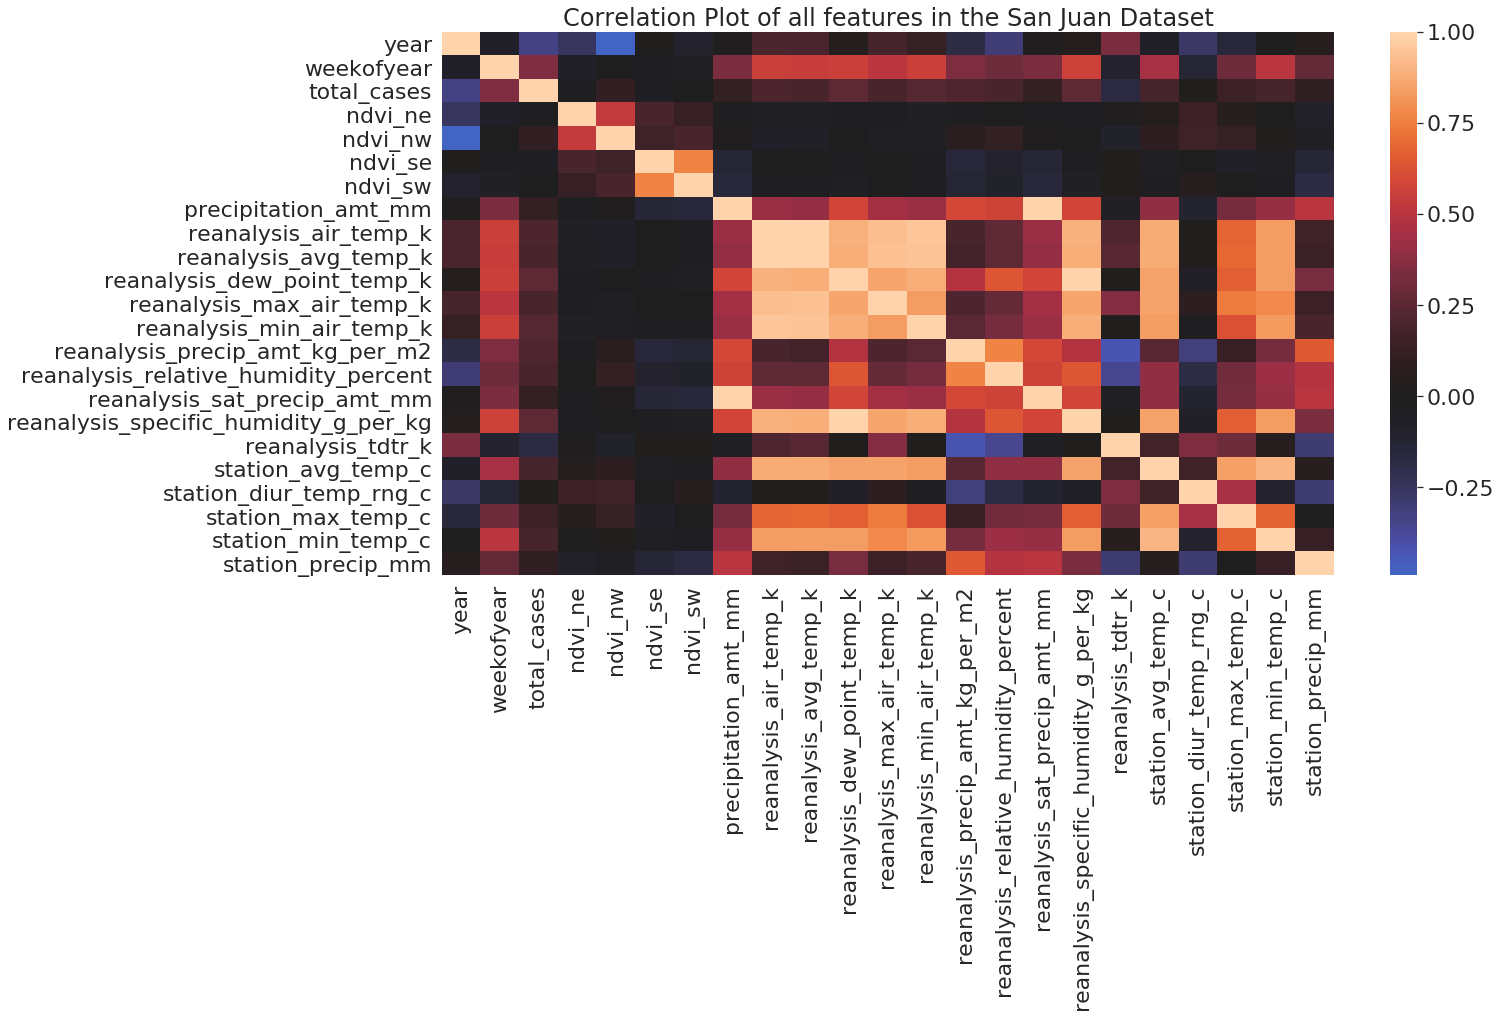

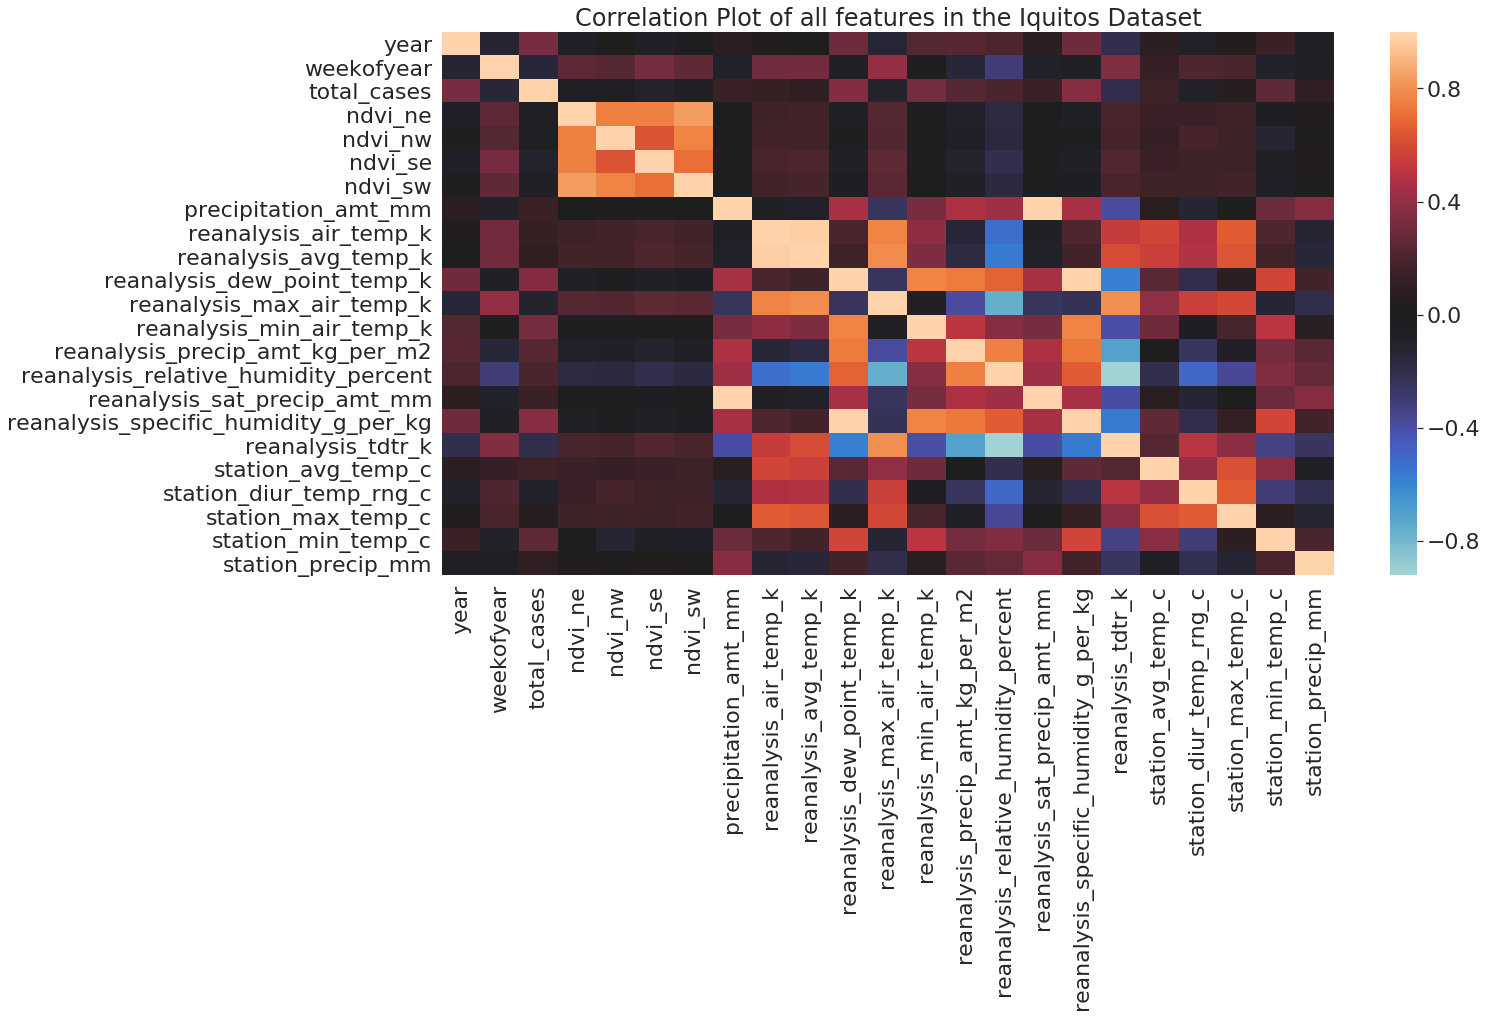

In [7]:
sj_corr = sj_df.corr('spearman')
iq_corr = iq_df.corr('spearman')

sns.set(font_scale = 2)

plt.figure(figsize=(20, 10))
sns.heatmap(sj_corr, center=0)
plt.title('Correlation Plot of all features in the San Juan Dataset')

plt.figure(figsize=(20, 10))
sns.heatmap(iq_corr, center=0)
plt.title('Correlation Plot of all features in the Iquitos Dataset')

plt.show()

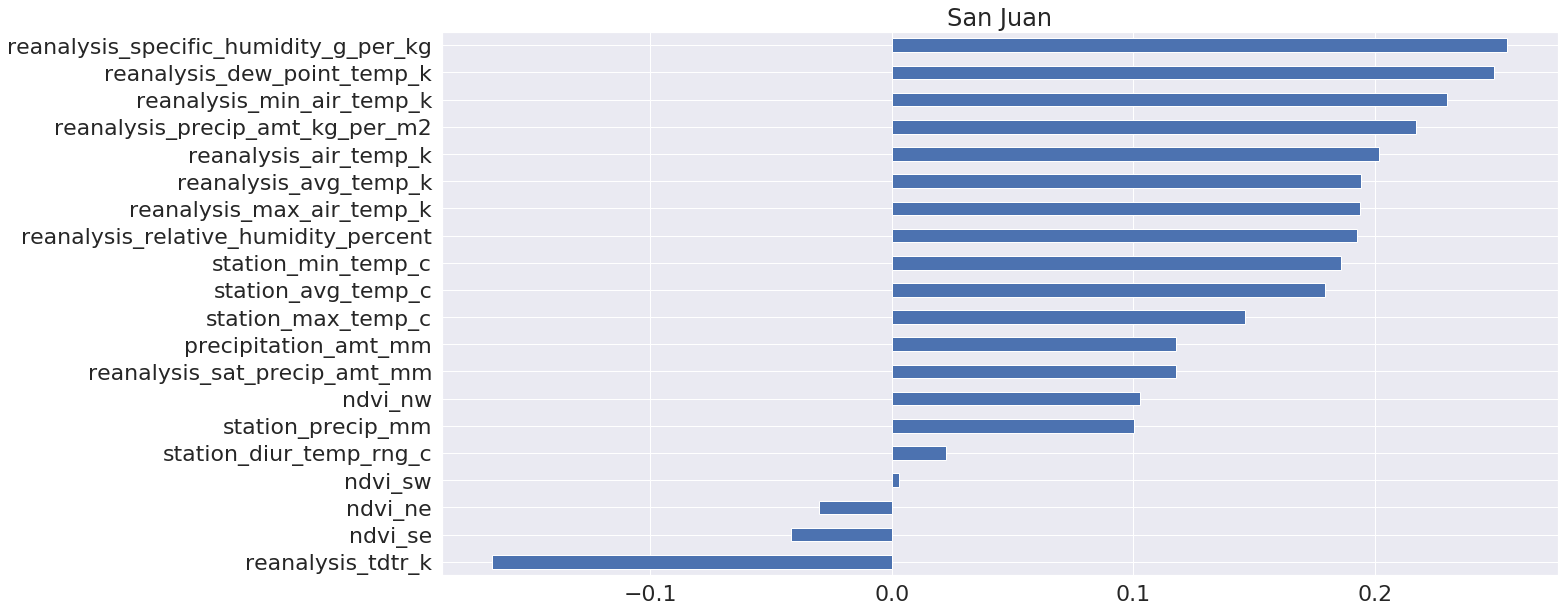

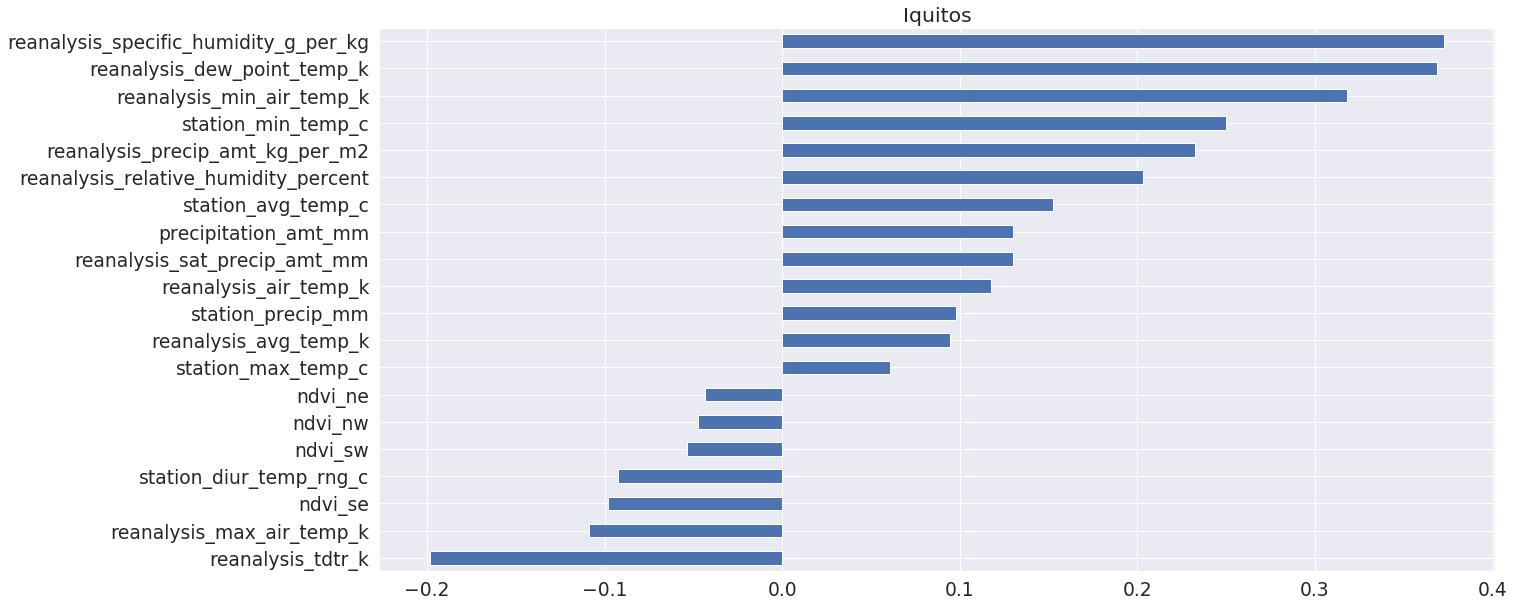

In [8]:
plt.figure(figsize=(20,10))
plt.title('San Juan')
sns.set(font_scale=1.7)
(sj_corr
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

plt.figure(figsize=(20,10))
plt.title('Iquitos')
sns.set(font_scale=1.7)
(iq_corr
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

## Temporal Feature Correlation
Although there is no direct correlation between the predicted variable (total_cases) and the features in a given time instant, it is possible that there is a delayed correlation, for instance, a patient may only present symptoms a week after being infected, the rise in mosquito population may only occur after rains have stopped because larvae need still water to grow. 

Index(['year', 'weekofyear', 'total_cases', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')
0.36611026668823216


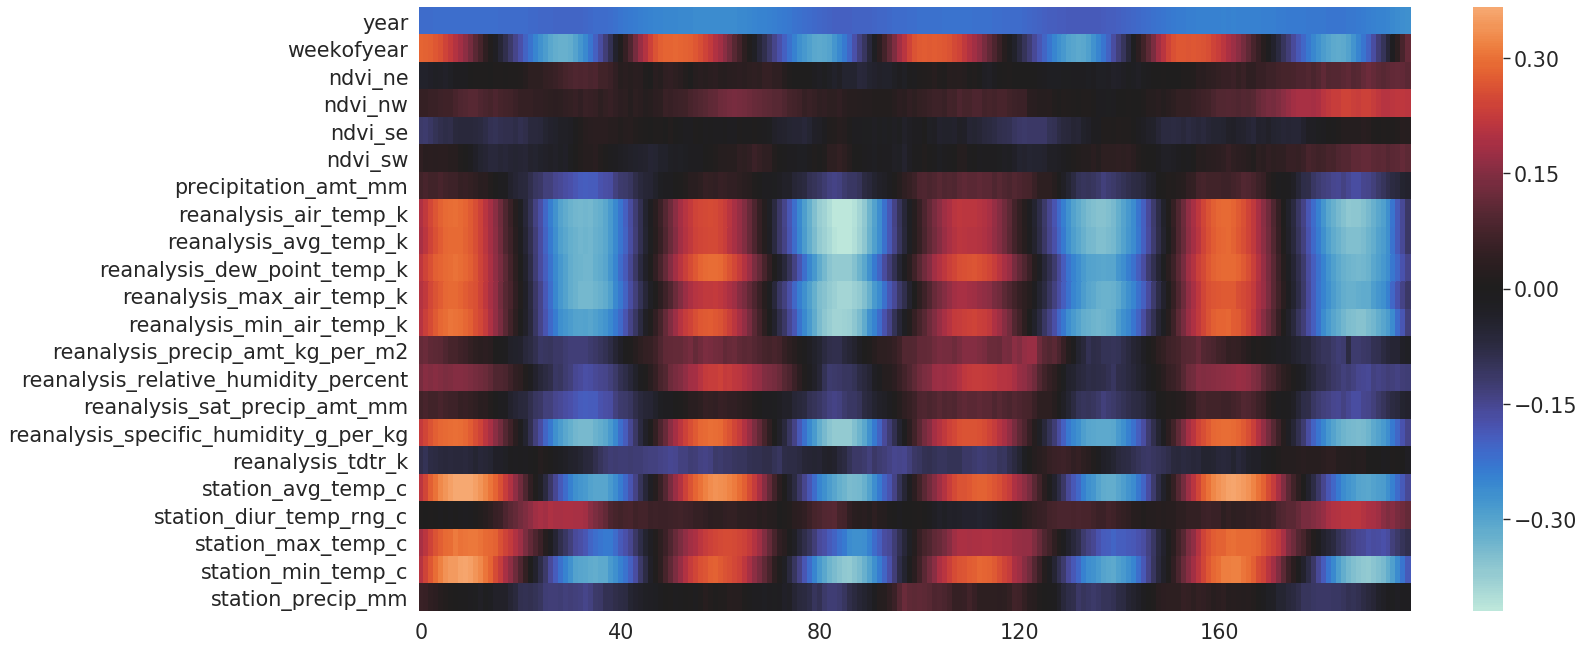

Index(['year', 'weekofyear', 'total_cases', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')
0.32394756054175305


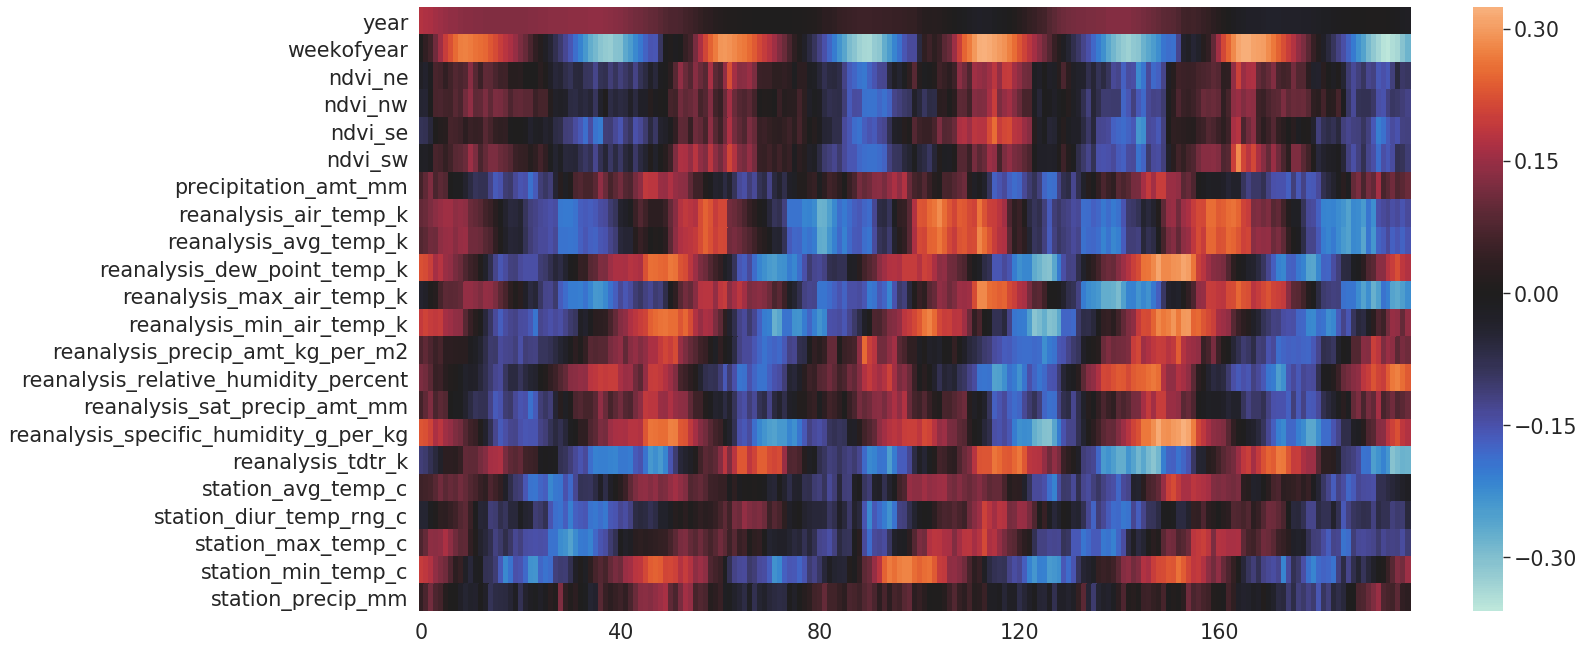

In [17]:
def coef(df, col, shift):
    x = df['total_cases'].values[shift:]
    y = df[col].values[0:-shift]
    return np.corrcoef(x, y)[0][1]

def plot_temporal_correlation(df):
    print(df.columns)
    list_of_corr = []
    columns = []
    for col in df.columns:
        if col == 'total_cases':
            continue
        corr = [coef(df, col, i) for i in range(1, 200)]
        list_of_corr.append(corr)
        columns.append(col)

    matrix = np.array(list_of_corr)
    print(matrix.max())
    plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(matrix, center=0, yticklabels=columns, xticklabels=40)
    plt.show()
    
plot_temporal_correlation(sj_df)
plot_temporal_correlation(iq_df)    

## Correlation Analysis in the peaks



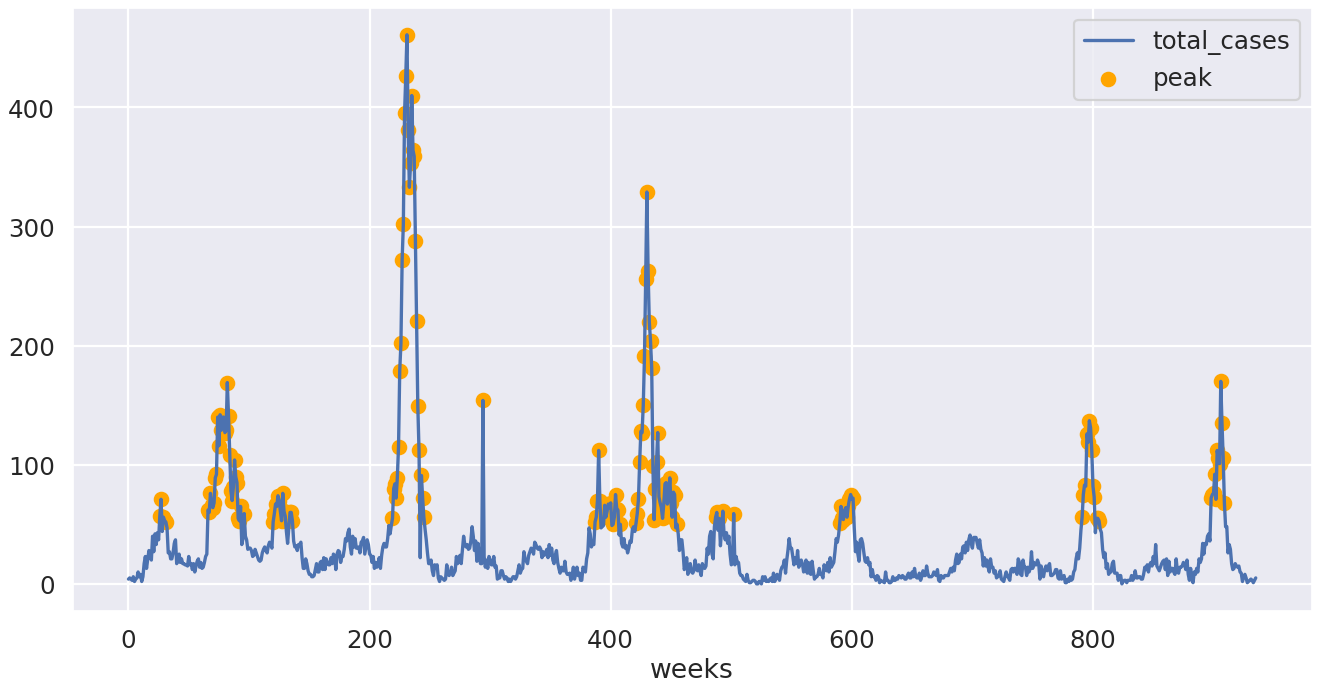

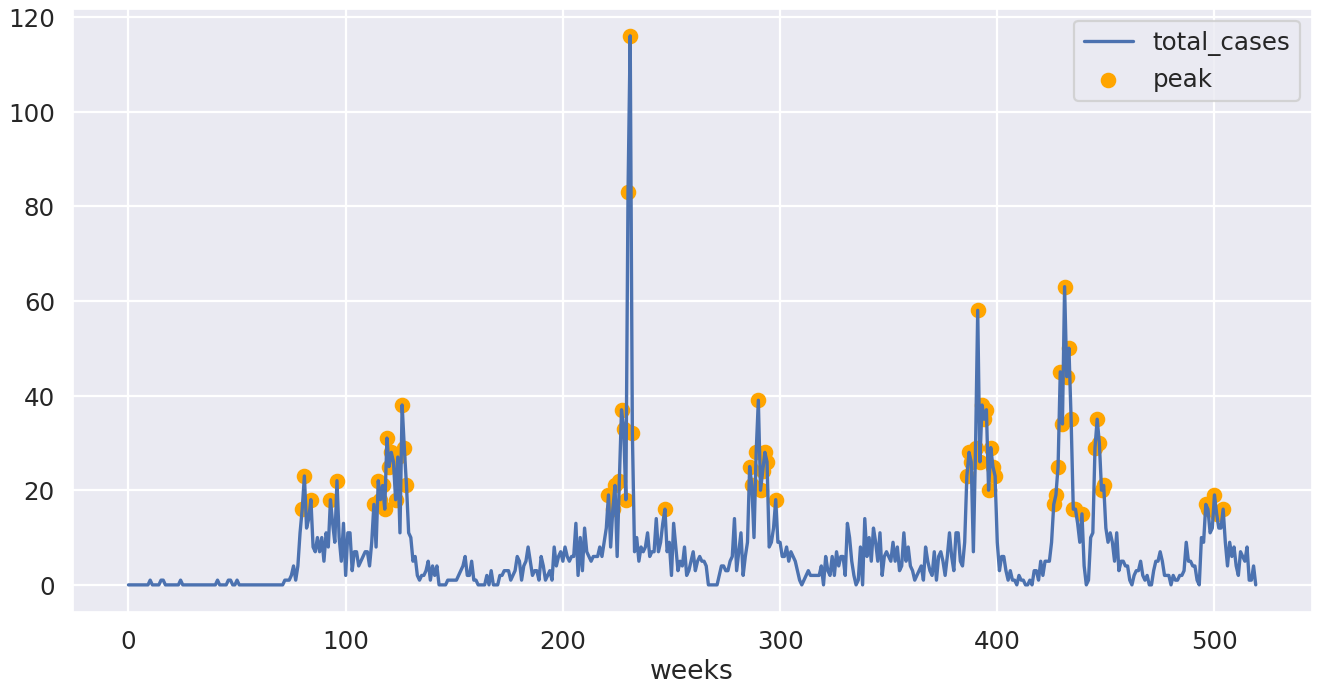

In [10]:
def plot_peak_threshold(df, threshold):
    sns.set_context("poster")
    plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    df = df.reset_index()
    b = df[df['total_cases'] >= threshold]
    plt.scatter(b.index, b['total_cases'].values, color='orange', label='peak')
    plt.plot(df.total_cases.values, label='total_cases')
    plt.xlabel("weeks")
    plt.legend()
#     plt.hlines(threshold, xmin=0, xmax=len(df.total_cases.values), colors='k', linestyles='solid', label='')
    plt.show()

    
sj_thr = 50
iq_thr = 15
    
plot_peak_threshold(sj_df, sj_thr)
plot_peak_threshold(iq_df, iq_thr)

sj_peak_df = sj_df[sj_df['total_cases']> sj_thr]
iq_peak_df = iq_df[iq_df['total_cases']> iq_thr]


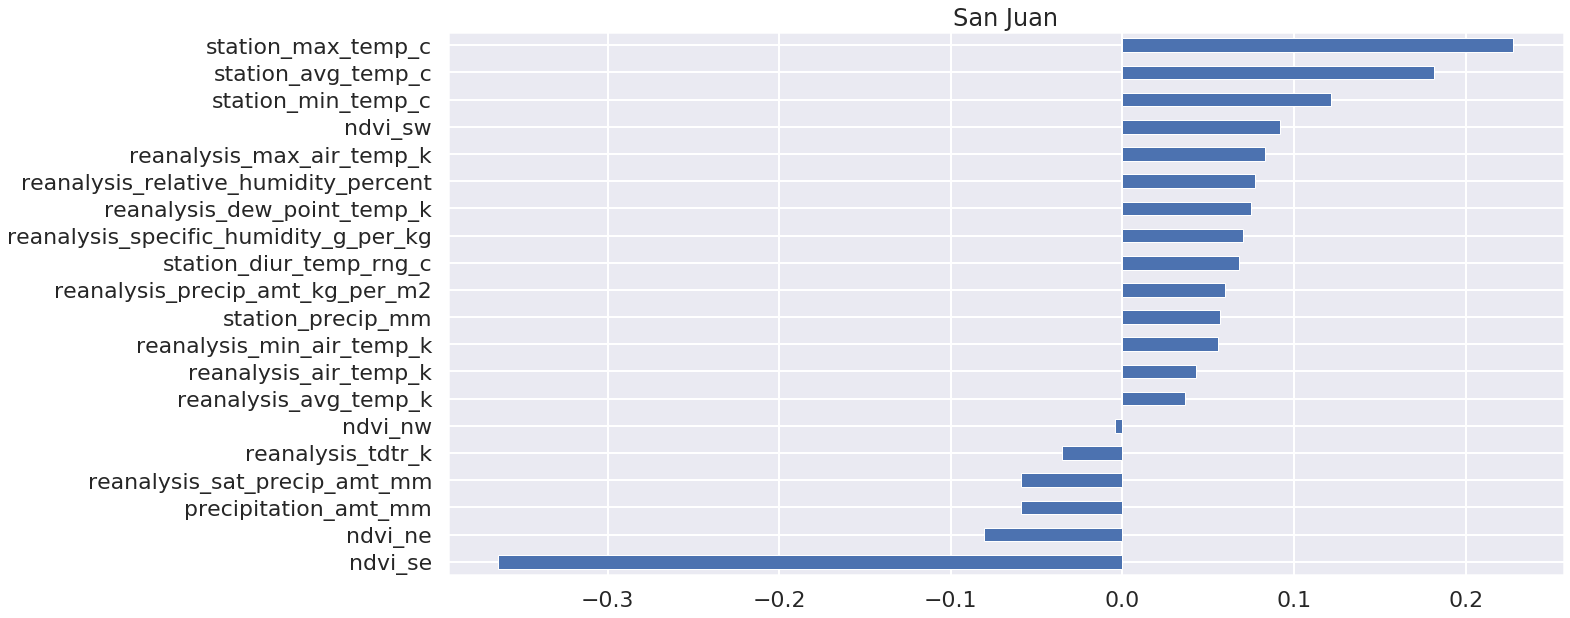

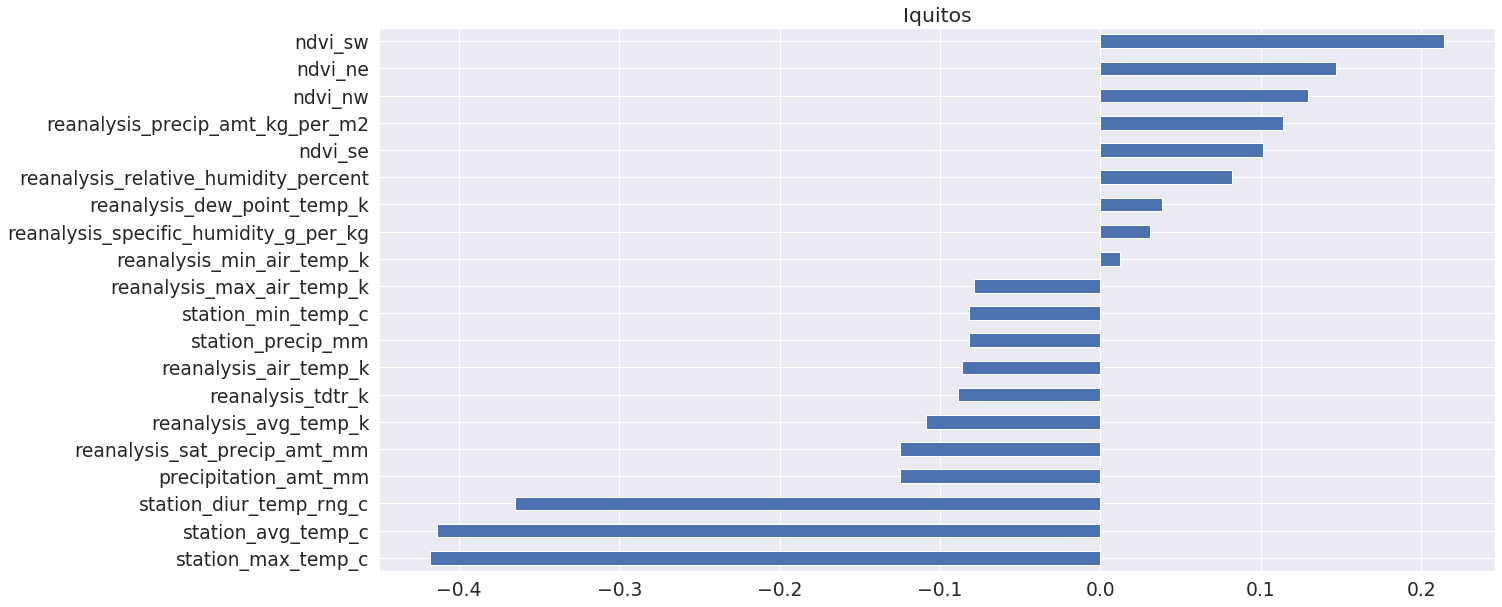

In [11]:
sj_corr_peak = sj_peak_df.corr()
iq_corr_peak = iq_peak_df.corr()

plt.figure(figsize=(20,10))
plt.title('San Juan')
sns.set(font_scale=1.7)
(sj_corr_peak
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

plt.figure(figsize=(20,10))
plt.title('Iquitos')
sns.set(font_scale=1.7)
(iq_corr_peak
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

In [12]:
a = sj_corr.total_cases.drop(['total_cases','weekofyear','year']).sort_values()


b = sj_corr_peak.total_cases.drop(['total_cases','weekofyear','year']).reindex(a.index)
c = iq_corr.total_cases.drop(['total_cases','weekofyear','year']).reindex(a.index)
d = iq_corr_peak.total_cases.drop(['total_cases','weekofyear','year']).reindex(a.index)

corr = pd.DataFrame({'sj_corr':a, 'sj_corr_peak':b, 'iq_corr':c, 'iq_corr_peak':d})
print(corr)
print(corr.to_latex(float_format=lambda x: '%.3f' % x))

                                        sj_corr  sj_corr_peak   iq_corr  \
reanalysis_tdtr_k                     -0.165448     -0.035403 -0.198604   
ndvi_se                               -0.041757     -0.363737 -0.098143   
ndvi_ne                               -0.030291     -0.080774 -0.043554   
ndvi_sw                                0.003196      0.091681 -0.053512   
station_diur_temp_rng_c                0.022313      0.067883 -0.092496   
station_precip_mm                      0.100182      0.056645  0.097613   
ndvi_nw                                0.102741     -0.004546 -0.047367   
reanalysis_sat_precip_amt_mm           0.117575     -0.059276  0.129937   
precipitation_amt_mm                   0.117575     -0.059276  0.129937   
station_max_temp_c                     0.146382      0.227492  0.060506   
station_avg_temp_c                     0.179584      0.181599  0.152458   
station_min_temp_c                     0.186265      0.121313  0.249791   
reanalysis_relative_humid